# **Задание**

**Цель:** применить на практике методы по оценке качества данных.

**Описание задания:**

В домашней работе необходимо провести очистку данных на примере датасета с информацией о пассажирах корабля Титаник. Данные можно скачать по [ссылке](https://www.kaggle.com/hesh97/titanicdataset-traincsv) или найти в материалах к уроку. На полученных данных обучите модель классификации, с целевым признаком Survived (1 – пассажир выжил, 0 – погиб). Обучите модель на необработанных данных и посчитайте метрику качества. Проведите очистку данных. Обучите модель на данных после обработки, посчитайте метрику качества. Сравнить полученные результаты. Значение метрики должно улучшиться.

**Этапы работы:**

1. Получите и загрузите данные.
2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.
3. Снова загрузите полные данные.
4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.
5. Проверьте данные на наличие пропущенных значений.

    a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.
    
    b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.
    
6. Категориальные переменные переведите в цифровые значения. Можно использовать [pd.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html), [preprocessing.LabelEncoder](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html). Старайтесь не использовать для этой задачи циклы.
7. Проверьте данные на наличие выбросов.

    a) Удалите выбросы, если считаете это целесообразным. Обоснуйте
    .
8. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)
9. Попробуйте математически преобразовать признак Age.
10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.
11. Сформулируйте выводы по проделанной работе.
    a) Кратко опишите какие преобразования были сделаны и почему.
    b) Сравните метрики моделей из п. 2 и п. 10.
    c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?
    
Для получения зачета по этому домашнему заданию, минимально, должно быть построено две модели, выведена одна метрика для каждой. В данных должны быть обработаны пропуски и категориальные значения.

**Результат:** применены на практике основные методы разведочного анализа данных (exploratory data analysis, EDA). Проведена оценка качества данных.

**Форма выполнения:**

ссылка на Jupyter Notebook, загруженный на GitHub;
ссылка на Google Colab;
файл с расширением .ipynb.
Инструменты:
Jupyter Notebook/Google Colab;
GitHub;
датасет.
Срок выполнения: дедлайн приема решений на проверку

**Рекомендации к выполнению:**

Текст оформляйте в отдельной ячейке Jupyter Notebook/Google Colab в формате markdown.
У графиков должен быть заголовок, подписи осей, легенда (опционально). Делайте графики бОльшего размера, чем стандартный вывод, чтобы увеличить читабельность.
Убедитесь, что по ссылкам есть доступ на чтение/просмотр.
Убедитесь, что все ячейки в работе выполнены и можно увидеть их вывод без повторного запуска.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 1. Получите и загрузите данные.

In [2]:
df = pd.read_csv('Data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Обучающий набор содержит признак Survived для каждого пассажира, обозначающий, выжил данный пассажир или нет (0 для умерших, 1 для выживших).

Каждая строчка набора данных содержит следующие поля:

* PassengerId - ID пассажира

* Pclass — класс пассажира (1 — высший, 2 — средний, 3 — низший);

* Name — имя;

* Sex — пол;

* Age — возраст;

* SibSp — количество братьев, сестер, сводных братьев, сводных сестер, супругов на борту титаника;

* Parch — количество родителей, детей (в том числе приемных) на борту титаника;

* Ticket — номер билета;

* Fare — плата за проезд;

* Cabin — каюта;

* Embarked — порт посадки (C — Шербур; Q — Квинстаун; S — Саутгемптон).

# 2. Удалите все пропущенные значения и категориальные переменные. Обучите модель. Выберете и посчитайте метрику качества.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.drop(['Age', 'Cabin', 'Embarked', 'Name', 'Sex', 'Ticket'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,SibSp,Parch,Fare
0,1,0,3,1,0,7.2500
1,2,1,1,1,0,71.2833
2,3,1,3,0,0,7.9250
3,4,1,1,1,0,53.1000
4,5,0,3,0,0,8.0500


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Survived', axis=1)
y = df.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [6]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train, y_train)

accuracy_1 = lr.score(X_test, y_test)
accuracy_1

0.7150837988826816

In [7]:
from sklearn.metrics import classification_report
m1 = classification_report( y_test, lr.predict(X_test) )
print(m1)

              precision    recall  f1-score   support

           0       0.72      0.84      0.78       105
           1       0.70      0.54      0.61        74

    accuracy                           0.72       179
   macro avg       0.71      0.69      0.69       179
weighted avg       0.71      0.72      0.71       179



# 3. Снова загрузите полные данные.

In [8]:
df = pd.read_csv('Data/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# 4. Удалите признаки, которые логически не нужны для построения модели. Обоснуйте.

Для построения модели не нужны столбцы **PassengerId**, **Name** и **Ticket**, содержащие ID пассажира, имя и номер билета соответственно. Ни один из этих параметров не может никак влиять на целевую переменную.

In [9]:
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


# 5. Проверьте данные на наличие пропущенных значений.

In [10]:
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin       687
Embarked      2
dtype: int64

#### a) Посчитайте, какой процент данных будет потерян, если просто удалить пропуски.

In [11]:
print(f'При удалении всех строк, содержащих пропуски будет утеряно {round(1 - len(df.dropna()) / len(df), 4) * 100}% данных.')

При удалении всех строк, содержащих пропуски будет утеряно 79.46% данных.


#### b) Заполните пропуски: средним значением; константой; классом, указывающим на то, что значение было пропущено; случайным числом. Для разных признаков используйте подходящий метод. Можно не использовать все перечисленные методы.

In [12]:
df.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891,714.000000,891.000000,891.000000,891.000000,204,889
unique,NaN,NaN,2,NaN,NaN,NaN,NaN,147,3
top,NaN,NaN,male,NaN,NaN,NaN,NaN,B96 B98,S
freq,NaN,NaN,577,NaN,NaN,NaN,NaN,4,644
mean,0.383838,2.308642,NaN,29.699118,0.523008,0.381594,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,14.526497,1.102743,0.806057,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,0.420000,0.000000,0.000000,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,20.125000,0.000000,0.000000,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,28.000000,0.000000,0.000000,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,38.000000,1.000000,0.000000,31.000000,NaN,NaN


In [13]:
df.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

Столбец **Cabin** содержит много пропусков, но терять данные не хочется, т.к. они могут быть важны для модели. Т.к. в столбце содержится категориальный признак, введем категорию **N**, обозначающую отсутствие информации и заменим на нее все пропуски.

In [14]:
df.loc[df.Cabin.isna(), 'Cabin'] = 'N'
df.isna().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Cabin         0
Embarked      2
dtype: int64

В столбце **Age** заменим пропуски на медианное значение.

In [15]:
df.loc[df.Age.isna(), 'Age'] = df.Age.median()
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    2
dtype: int64

В столбце **Embarked** заменим пропуски на модальное значение, т.к. в столбце содержатся категориальные значения.

In [16]:
df.Embarked.mode()

0    S
Name: Embarked, dtype: object

In [17]:
df.loc[df.Embarked.isna(), 'Embarked'] = df.Embarked.mode().get(0)
df.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Cabin       0
Embarked    0
dtype: int64

# 6. Категориальные переменные переведите в цифровые значения.

In [18]:
X = pd.get_dummies(df.drop('Survived', axis=1))
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,...,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,1,38.0,1,0,71.2833,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,26.0,0,0,7.9250,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,1,35.0,1,0,53.1000,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,0,8.0500,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [19]:
from sklearn.preprocessing import LabelEncoder

y = LabelEncoder().fit_transform(df.Survived)
y.shape

(891,)

# 7. Проверьте данные на наличие выбросов.

In [20]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Похожие на выбросы значения могут быть только в столбце **Fare**, но говорить однозначно, что это некорректные данные, мы не можем.

# 8. Постройте 1-2 графика на выбор. Визуализация должна быть основана на исследуемых данных и быть полезной (из графика можно сделать вывод об особенностях датасета/класса/признака)

[Text(0.5, 1.0, 'Соотношение числа выживших и погибших в данных')]

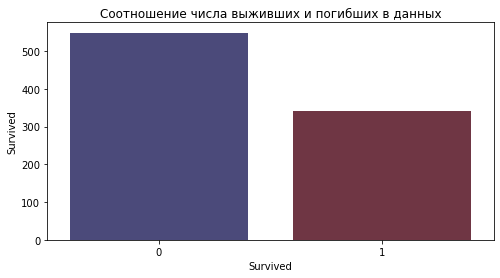

In [21]:
plt.figure(figsize=(8,4))

sns.barplot(x=df.Survived, y=df.Survived.value_counts(),
            palette='icefire').set(title="Соотношение числа выживших и погибших в данных")

В данных причутствует небольшой дисбаланс классов. Необходимо учесть это при обучении модели.

[Text(0.5, 1.0, 'Распределение выживших и погибших по возрасту')]

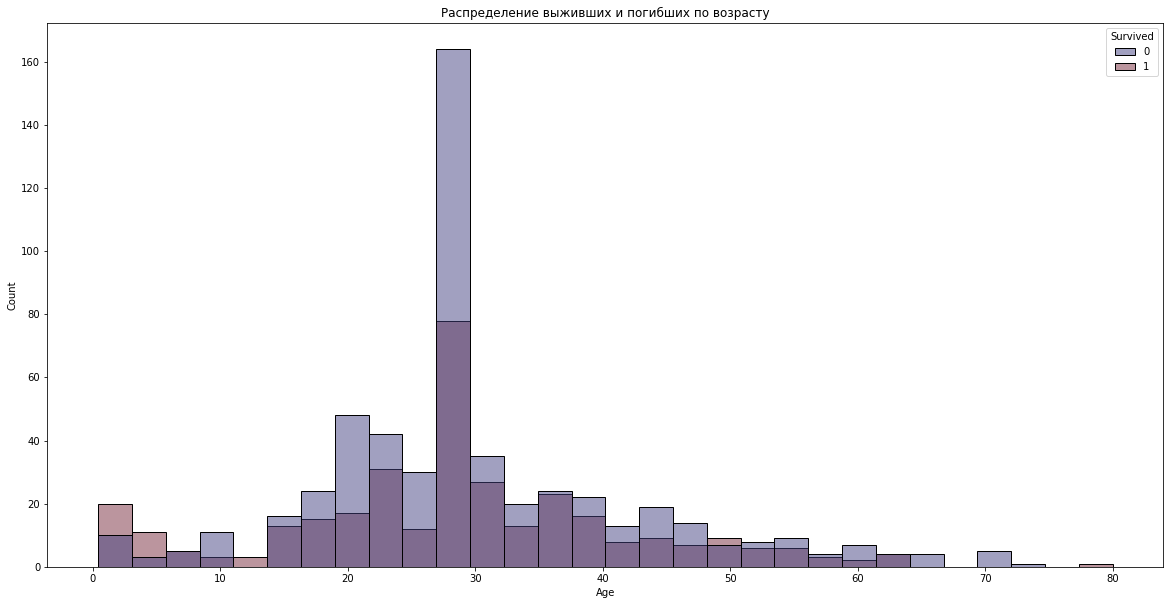

In [22]:
plt.figure(figsize=(20,10))

sns.histplot(data=df, x='Age', hue='Survived', palette='icefire').set(title="Распределение выживших и погибших по возрасту")

Соотношение погибших и выживших неравномерно в зависимости от возраста.

# 9. Попробуйте математически преобразовать признак Age.

Т.к. разброс по возрасту достаточно большой - разобьем данные по возрастным группам.

In [23]:
def age_groups(data):
    '''Преобразование возраста в возрастную группу'''
    if 0 <= data < 10:
        return 0
    elif 10 <= data < 20:
        return 1
    elif 20 <= data < 30:
        return 2
    elif 30 <= data < 40:
        return 3
    elif 40 <= data < 50:
        return 4
    elif 50 <= data < 60:
        return 5
    else:
        return 6

In [24]:
X['Age_group'] = X['Age'].apply(age_groups)
X.drop('Age', axis=1, inplace=True)
X.head()

,Pclass,SibSp,Parch,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,...,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Age_group
0,3,1,0,7.2500,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,2
1,1,1,0,71.2833,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,3
2,3,0,0,7.9250,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,2
3,1,1,0,53.1000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
4,3,0,0,8.0500,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,1,3


# 10. Обучите ту же модель, что в п. 2 на преобразованных данных. Посчитайте ту же, что в п. 2 метрику.

In [25]:
model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=1000, multi_class='multinomial',
                                        class_weight={0: pd.DataFrame(y_train).value_counts(normalize=True)[0],
                                                      1: pd.DataFrame(y_train).value_counts(normalize=True)[1]})
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)
model.fit(X_train, y_train)
accuracy_2 = model.score(X_test, y_test)
accuracy_2

0.8212290502793296

In [26]:
m2 = classification_report( y_test, model.predict(X_test) )
print(m2)

              precision    recall  f1-score   support

           0       0.82      0.90      0.85       105
           1       0.83      0.72      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179



# 11. Сформулируйте выводы по проделанной работе.

### a) Кратко опишите какие преобразования были сделаны и почему.

В рамках предобработки данных были произведены следующие действия:

* удалены столбцы PassengerId, Name и Ticket, т.к. они не содержат информации, влияющей на то, выжил пассажир или нет;

* заполнены пропуски, с использованием нового класса, медианного и модального значения, т.к. удаление пропусков лишило бы нас 80% данных;

* категориальные переменные переведены в цифровые значения для обеспечения работы модели;

* признак Age разделен на категории из-за большого разброса значений.

### b) Сравните метрики моделей из п. 2 и п. 10.

In [28]:
print(f'Преобразования, проведенные над данными и подбор оптимальных параметров \
модели позволили улучшить метрику accuracy на {round(accuracy_2-accuracy_1, 4)*100}%.')

Преобразования, проведенные над данными и подбор оптимальных параметров модели позволили улучшить метрику accuracy на 10.61%.


### c) Напишите свое мнение о целесообразности работы с данными при построении моделей машинного обучения. Нужно ли аналогичным образов исследовать и дополнять действительно большие данные?

Я считаю, что работа с данными является важной и неотъемлемой частью процесса построения моделей машинного обучения. Чем больше и качественнее данные, тем точнее и эффективнее может быть построена модель.

При работе с большими данными часто возникает необходимость в их анализе и дополнении, так как именно здесь можно обнаружить скрытые закономерности и особенности, которые могут повлиять на точность модели. При этом необходимо помнить о том, что некоторые виды анализа могут быть трудоемкими и требовать значительных вычислительных ресурсов, а также о необходимости обеспечения безопасности данных.